<a href="https://colab.research.google.com/github/eedduu/TFG/blob/main/code/old_playgrounds/TFG_LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train.shape
#Cargo el dataset separando entrenamiento y test


11490434/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)

In [ ]:
#Como vemos las imagenes son 28x28, pero LeNet usa imagenes de 32x32,
#por lo que tendré que cambiarlo
x_train = tf.pad(x_train, [[0,0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0,0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [ ]:
#Contruyo la CNN de forma general para mejor generalización. La mayoría de las redes aceptan inputs de tensores 4-dimensionales(tamaño de batch, altura, anchura y canal).
#Hemos visto justo antes que nuestros datos son un tensor de 3 dimensiones, con tamaño, anchura y altura, así que expando con una 'dummy' dimension

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
model = models.Sequential()

#Este modelo tiene 3 capas de convolucion, con un kernel de 5x5
#Todas las capas usan stride 1 ????
#Las avg pooling layers usan kernerls 2x2 por defecto
#3 capas de convolucion con 2 de subsampling entre medias
#Dos capas totalmente conectadas al final, pasando primero por un flatten
#Las dos capas del fnal con 84 y 10 neuronas y tang hip y doftmax respectivamente


#Capa de convolucion (filtros, kernel_size, activacion tang hip, como es la primera capa tengo que ponerle el tamaño del input)
model.add(layers.Conv2D(6,5,activation='tanh', input_shape=x_train.shape[1:]))

#Capa de average pooling
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16,5,activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120,5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

model2 = models.Sequential()

#Este modelo tiene 3 capas de convolucion, con un kernel de 5x5
#Todas las capas usan stride 1 ????
#Las avg pooling layers usan kernerls 2x2 por defecto
#3 capas de convolucion con 2 de subsampling entre medias
#Dos capas totalmente conectadas al final, pasando primero por un flatten
#Las dos capas del fnal con 84 y 10 neuronas y tang hip y doftmax respectivamente


#Capa de convolucion (filtros, kernel_size, activacion tang hip, como es la primera capa tengo que ponerle el tamaño del input)
model2.add(layers.Conv2D(6,5,activation='tanh', input_shape=x_train.shape[1:]))

#Capa de average pooling
model2.add(layers.AveragePooling2D(2))
model2.add(layers.Activation('sigmoid'))
model2.add(layers.Conv2D(16,5,activation='tanh'))
model2.add(layers.AveragePooling2D(2))
model2.add(layers.Activation('sigmoid'))
model2.add(layers.Conv2D(120,5, activation='tanh'))
model2.add(layers.Flatten())
model2.add(layers.Dense(84, activation='tanh'))
model2.add(layers.Dense(10, activation='softmax'))


In [ ]:
#SGD uso esa loss function porque tengo varios labels y el output numerico
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=20)



Epoch 1/20
938/938 [==============================] - 6s 4ms/step - loss: 0.2332 - accuracy: 0.9259
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2000 - accuracy: 0.9369
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1838 - accuracy: 0.9407
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1669 - accuracy: 0.9470
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1533 - accuracy: 0.9515
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1413 - accuracy: 0.9550
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1319 - accuracy: 0.9579
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1207 - accuracy: 0.9612
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1205 - accuracy: 0.9624
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1114 - accuracy: 0.9645

In [ ]:
#GD

model2.compile(optimizer='sgd', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, batch_size=60000, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 2.3398 - accuracy: 0.0992
Epoch 2/30
1/1 [==============================] - 0s 408ms/step - loss: 2.3216 - accuracy: 0.0992
Epoch 3/30
1/1 [==============================] - 0s 408ms/step - loss: 2.3131 - accuracy: 0.0992
Epoch 4/30
1/1 [==============================] - 0s 409ms/step - loss: 2.3088 - accuracy: 0.0992
Epoch 5/30
1/1 [==============================] - 0s 412ms/step - loss: 2.3064 - accuracy: 0.0962
Epoch 6/30
1/1 [==============================] - 0s 409ms/step - loss: 2.3050 - accuracy: 0.1124
Epoch 7/30
1/1 [==============================] - 0s 414ms/step - loss: 2.3041 - accuracy: 0.1124
Epoch 8/30
1/1 [==============================] - 0s 412ms/step - loss: 2.3035 - accuracy: 0.1124
Epoch 9/30
1/1 [==============================] - 0s 413ms/step - loss: 2.3030 - accuracy: 0.1124
Epoch 10/30
1/1 [==============================] - 0s 413ms/step - loss: 2.3027 - accuracy: 0.1124
Epoch 11/30
1/1 [=====

In [ ]:
#TODO
#Probar con algoritmos geneticos y luego hacer lo mismo con el dataset CIFAR-10.
#Seria interesante comparar los tiempos de ejecucion. Tenngo que ver a qué se incializan los pesos aqui y luego probar otros modos

#comparar sgd vs adam vs genet vs diff evol
#Ver tiempos, cual obtiene mejor rendimiento en entrenamiento, cual tiene mejor rendimiento en generalizacion
#Matematizar BackPror

Epoch 1/3


KeyboardInterrupt: ignored

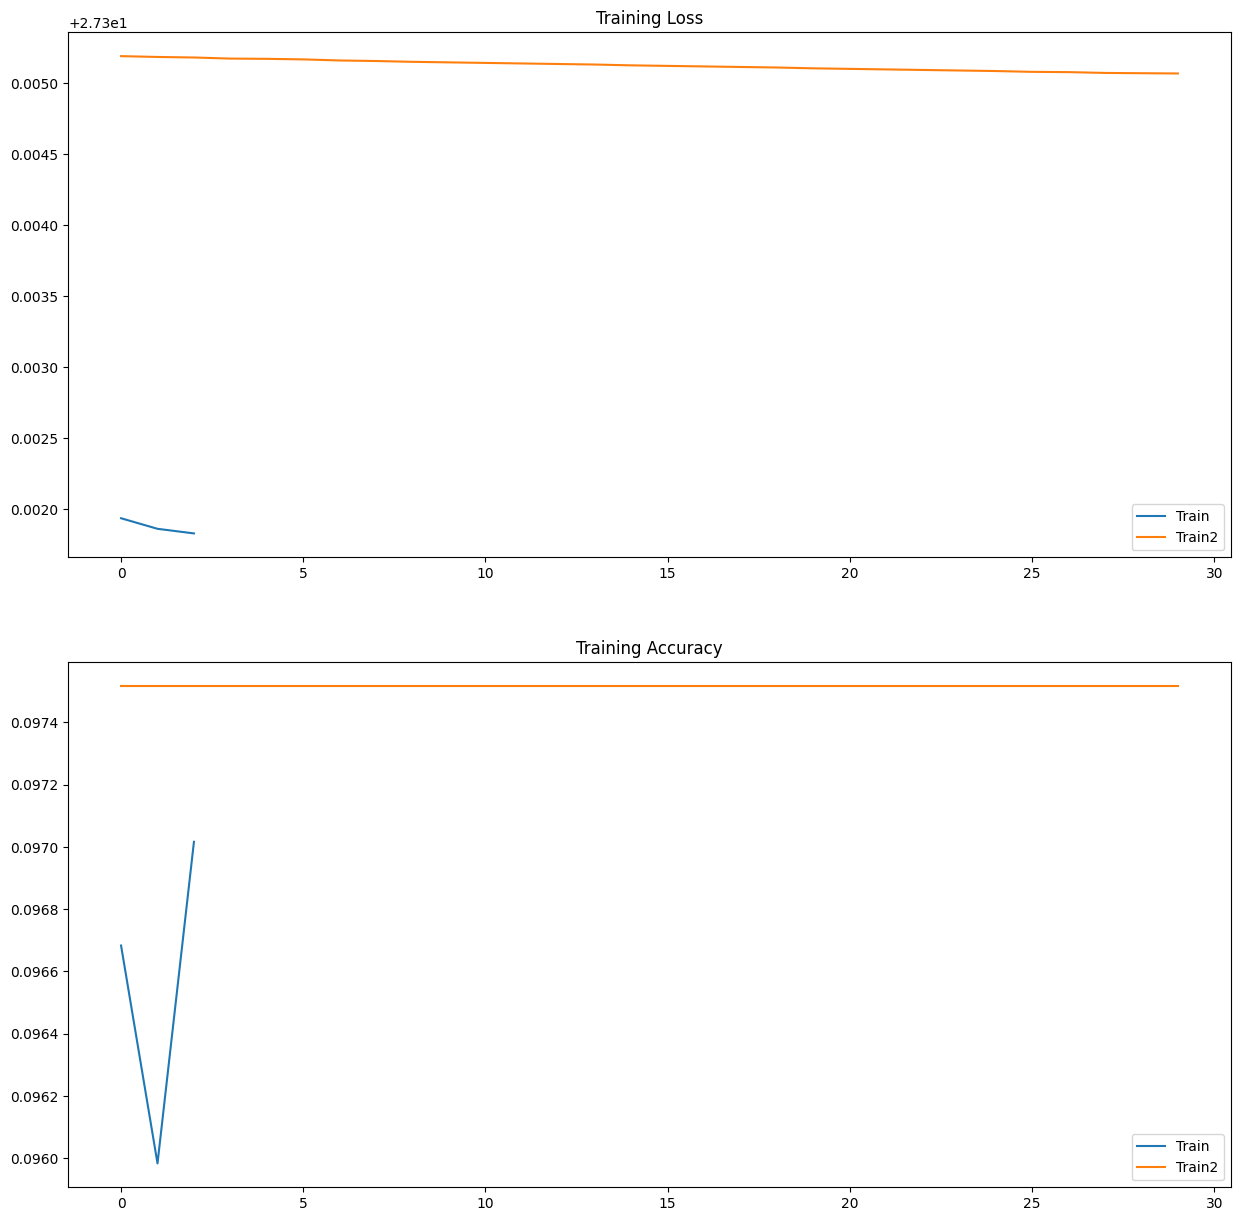

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history2.history['loss'])
axs[0].title.set_text('Training Loss')
axs[0].legend(['Train', 'Train2'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history2.history['accuracy'])
axs[1].title.set_text('Training Accuracy')
axs[1].legend(['Train', 'Train2'])



In [ ]:
print(model.evaluate(x_test, y_test))
print(model2.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 27.2503 - accuracy: 0.0988
[27.25031280517578, 0.09880000352859497]
313/313 [==============================] - 1s 3ms/step - loss: 27.2509 - accuracy: 0.0974
[27.25089454650879, 0.09740000218153]
